In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv
import numpy as np

In [2]:
train_path = r'C:\Users\ayush\Downloads\data\extracted_images'

train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    shear_range = 0.2, 
    zoom_range = 0.2,
    validation_split = 0.25
)
train_set = train_datagen.flow_from_directory(
    train_path, 
    target_size = (45, 45), 
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    classes = ['!', '+', '0', ')', '(', ',', '-'],
    shuffle = True,
    subset='training',
    seed = 123
)

test_set = train_datagen.flow_from_directory(
    train_path, 
    target_size = (45, 45), 
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    classes = ['!', '+', '0', ')', '(', ',', '-'],
    shuffle = True,
    subset='validation',
    seed = 123
)

Found 73411 images belonging to 7 classes.
Found 24467 images belonging to 7 classes.


In [3]:
def symbol(ind):
    symbols = ['!', '+', '0', ')', '(', ',', '-']
    symb = symbols[ind.argmax()]
    return symb

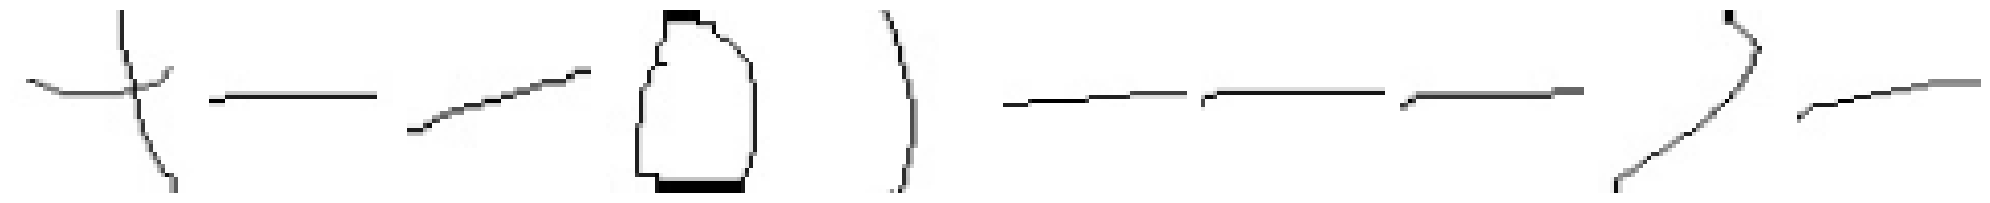

+
-
-
0
)
-
-
-
)
-


In [4]:
imgs, labels = next(train_set)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(imgs)
for i in range(10):
    print(symbol(labels[i]))

In [9]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(45, 45, 1)))
model.add(tf.keras.layers.MaxPool2D(strides=2))

model.add(tf.keras.layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dense(7, activation='softmax'))

c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 45, 45, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 18, 18, 48)     │        38,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3888)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       995,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        21,588 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           595 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057,047 (4.03 MB)

 Trainable params: 1,057,047 (4.03 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
adam = tf.keras.optimizers.Adam(learning_rate=5e-4)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
model.fit(train_set, validation_data = test_set, epochs = 20)

Epoch 1/20


c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2295/2295 ━━━━━━━━━━━━━━━━━━━━ 229s 99ms/step - accuracy: 0.9171 - loss: 0.2370 - val_accuracy: 0.9854 - val_loss: 0.0476
Epoch 2/20
2295/2295 ━━━━━━━━━━━━━━━━━━━━ 56s 25ms/step - accuracy: 0.9856 - loss: 0.0501 - val_accuracy: 0.9876 - val_loss: 0.0407
Epoch 3/20
2295/2295 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 0.9866 - loss: 0.0431 - val_accuracy: 0.9890 - val_loss: 0.0353
Epoch 4/20
2295/2295 ━━━━━━━━━━━━━━━━━━━━ 64s 28ms/step - accuracy: 0.9894 - loss: 0.0353 - val_accuracy: 0.9886 - val_loss: 0.0354
Epoch 5/20
2295/2295 ━━━━━━━━━━━━━━━━━━━━ 75s 33ms/step - accuracy: 0.9895 - loss: 0.0311 - val_accuracy: 0.9891 - val_loss: 0.0330
Epoch 6/20
2295/2295 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 0.9897 - loss: 0.0312 - val_accuracy: 0.9918 - val_loss: 0.0252
Epoch 7/20
2295/2295 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 0.9906 - loss: 0.0275 - val_accuracy: 0.9907 - val_loss: 0.0275
Epoch 8/20
2295/2295 ━━━━━━━━━━━━━━━━━━━━ 61s 27ms/step - accuracy: 0.9911 - loss: 0.0

In [15]:
val_loss, val_accuracy = model.evaluate(test_set)
print(val_loss,val_accuracy)

765/765 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9942 - loss: 0.0173
0.01694941334426403 0.9943597316741943


In [16]:
def prediction(image_path):
    img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap = 'gray')
    img = cv.resize(img,(45, 45))
    norm_image = cv.normalize(img, None, alpha = 0, beta = 1, norm_type = cv.NORM_MINMAX, dtype = cv.CV_32F)
    norm_image = norm_image.reshape((norm_image.shape[0], norm_image.shape[1], 1))
    case = np.asarray([norm_image])
    pred = model.predict([case])    
    return 'Prediction: ' + symbol(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prediction: -


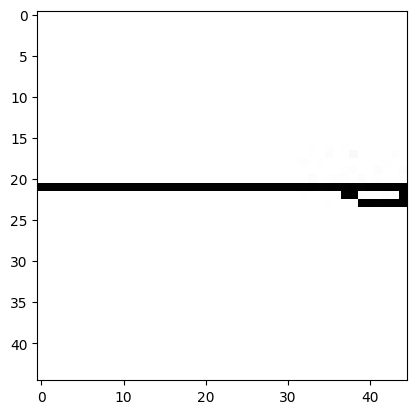

In [24]:
image_path = r'C:\Users\ayush\Downloads\data\extracted_images\-\-_113542.jpg'
result = prediction(image_path)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction: +


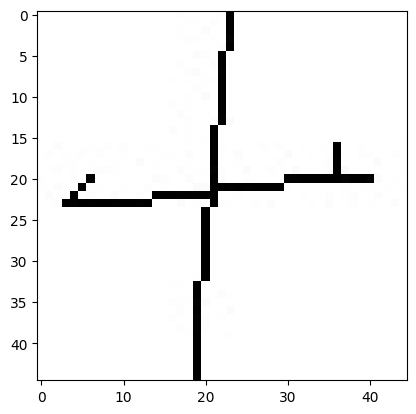

In [30]:
image_path = r'C:\Users\ayush\Downloads\data\extracted_images\+\+_113356.jpg'
result = prediction(image_path)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: ,


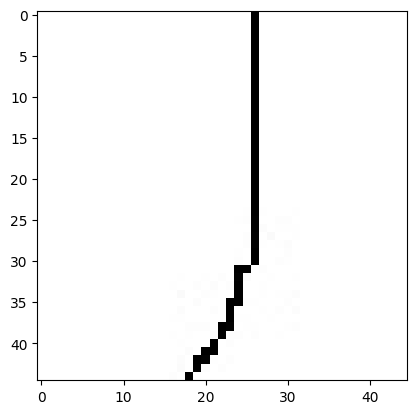

In [33]:
image_path = r'C:\Users\ayush\Downloads\data\extracted_images\,\,_104598.jpg'
result = prediction(image_path)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: 0


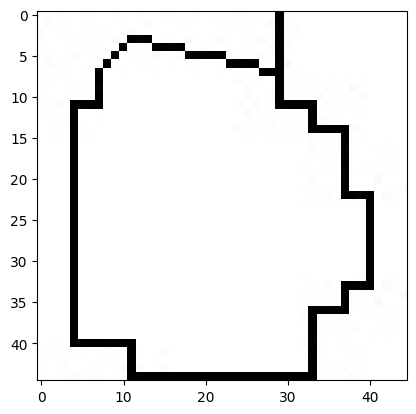

In [36]:
image_path = r'C:\Users\ayush\Downloads\data\extracted_images\0\0_112952.jpg'
result = prediction(image_path)
print(result)